<a href="https://colab.research.google.com/github/Sree-KM2001/Machine-Learning-Assignment/blob/main/ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Load the dataset
url = "https://drive.google.com/uc?export=download&id=1FHmYNLs9v0Enc-UExEMpitOFGsWvB2dP"
df = pd.read_csv(url)

# Check for missing values and data types
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [4]:
# Separate the numeric columns and categorical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Impute missing values for numerical columns (using mean for imputation)
imputer = SimpleImputer(strategy="mean")
df[numerical_cols] = imputer.fit_transform(df[numerical_cols])

# For categorical columns, impute using the most frequent value (mode)
imputer_cat = SimpleImputer(strategy="most_frequent")
df[categorical_cols] = imputer_cat.fit_transform(df[categorical_cols])

# If necessary, you can apply one-hot encoding for categorical columns (optional)
df_encoded = pd.get_dummies(df, drop_first=True)

# Now df_encoded should be ready for further processing
print(df_encoded.head())

   car_ID  symboling  wheelbase  carlength  carwidth  carheight  curbweight  \
0     1.0        3.0       88.6      168.8      64.1       48.8      2548.0   
1     2.0        3.0       88.6      168.8      64.1       48.8      2548.0   
2     3.0        1.0       94.5      171.2      65.5       52.4      2823.0   
3     4.0        2.0       99.8      176.6      66.2       54.3      2337.0   
4     5.0        2.0       99.4      176.6      66.4       54.3      2824.0   

   enginesize  boreratio  stroke  ...  cylindernumber_three  \
0       130.0       3.47    2.68  ...                 False   
1       130.0       3.47    2.68  ...                 False   
2       152.0       2.68    3.47  ...                 False   
3       109.0       3.19    3.40  ...                 False   
4       136.0       3.19    3.40  ...                 False   

   cylindernumber_twelve  cylindernumber_two  fuelsystem_2bbl  \
0                  False               False            False   
1               

In [6]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load the dataset (replace this with loading your specific dataset)
# Here I am using the Iris dataset as an example
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Add a dummy target column for demonstration purposes
df['Price'] = iris.target  # Just for illustration, replace this with your actual target column

# Check for missing values and handle them
# Assuming there are no missing values in the Iris dataset, so no imputation needed
# But for your dataset, we will use SimpleImputer
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
imputer = SimpleImputer(strategy="mean")
df[numerical_cols] = imputer.fit_transform(df[numerical_cols])

# Splitting the data into features (X) and target (y)
X = df.drop(columns=["Price"])
y = df["Price"]

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the Linear Regression model
lin_reg = LinearRegression()

# Train the model on the scaled training data
lin_reg.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_lin = lin_reg.predict(X_test_scaled)

# Evaluate the model
r2_lin = r2_score(y_test, y_pred_lin)
mse_lin = mean_squared_error(y_test, y_pred_lin)
mae_lin = mean_absolute_error(y_test, y_pred_lin)

# Print the evaluation results
print(f"Linear Regression: R^2={r2_lin}, MSE={mse_lin}, MAE={mae_lin}")


Linear Regression: R^2=0.9468960016420045, MSE=0.03711379440797687, MAE=0.14637694965308523


In [7]:
from sklearn.tree import DecisionTreeRegressor

# Initialize and train Decision Tree model
dt_reg = DecisionTreeRegressor(random_state=42)
dt_reg.fit(X_train_scaled, y_train)

# Predict on test data
y_pred_dt = dt_reg.predict(X_test_scaled)

# Evaluate the model
r2_dt = r2_score(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)

print(f"Decision Tree Regressor: R^2={r2_dt}, MSE={mse_dt}, MAE={mae_dt}")


Decision Tree Regressor: R^2=1.0, MSE=0.0, MAE=0.0


In [8]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train Random Forest model
rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(X_train_scaled, y_train)

# Predict on test data
y_pred_rf = rf_reg.predict(X_test_scaled)

# Evaluate the model
r2_rf = r2_score(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)

print(f"Random Forest Regressor: R^2={r2_rf}, MSE={mse_rf}, MAE={mae_rf}")


Random Forest Regressor: R^2=0.9978632750397456, MSE=0.001493333333333334, MAE=0.014666666666666672


In [9]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize and train Gradient Boosting model
gb_reg = GradientBoostingRegressor(random_state=42)
gb_reg.fit(X_train_scaled, y_train)

# Predict on test data
y_pred_gb = gb_reg.predict(X_test_scaled)

# Evaluate the model
r2_gb = r2_score(y_test, y_pred_gb)
mse_gb = mean_squared_error(y_test, y_pred_gb)
mae_gb = mean_absolute_error(y_test, y_pred_gb)

print(f"Gradient Boosting Regressor: R^2={r2_gb}, MSE={mse_gb}, MAE={mae_gb}")


Gradient Boosting Regressor: R^2=0.9914217405276045, MSE=0.005995250231263076, MAE=0.03599194026293924


In [10]:
from sklearn.svm import SVR

# Initialize and train SVR model
svr_reg = SVR()
svr_reg.fit(X_train_scaled, y_train)

# Predict on test data
y_pred_svr = svr_reg.predict(X_test_scaled)

# Evaluate the model
r2_svr = r2_score(y_test, y_pred_svr)
mse_svr = mean_squared_error(y_test, y_pred_svr)
mae_svr = mean_absolute_error(y_test, y_pred_svr)

print(f"Support Vector Regressor: R^2={r2_svr}, MSE={mse_svr}, MAE={mae_svr}")


Support Vector Regressor: R^2=0.9615962412420095, MSE=0.026839960287528893, MAE=0.13694863993163273


In [11]:
# Comparing models
models = ['Linear Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'SVR']
r2_scores = [r2_lin, r2_dt, r2_rf, r2_gb, r2_svr]
mse_scores = [mse_lin, mse_dt, mse_rf, mse_gb, mse_svr]
mae_scores = [mae_lin, mae_dt, mae_rf, mae_gb, mae_svr]

comparison_df = pd.DataFrame({
    'Model': models,
    'R^2': r2_scores,
    'MSE': mse_scores,
    'MAE': mae_scores
})

print(comparison_df)


               Model       R^2       MSE       MAE
0  Linear Regression  0.946896  0.037114  0.146377
1      Decision Tree  1.000000  0.000000  0.000000
2      Random Forest  0.997863  0.001493  0.014667
3  Gradient Boosting  0.991422  0.005995  0.035992
4                SVR  0.961596  0.026840  0.136949


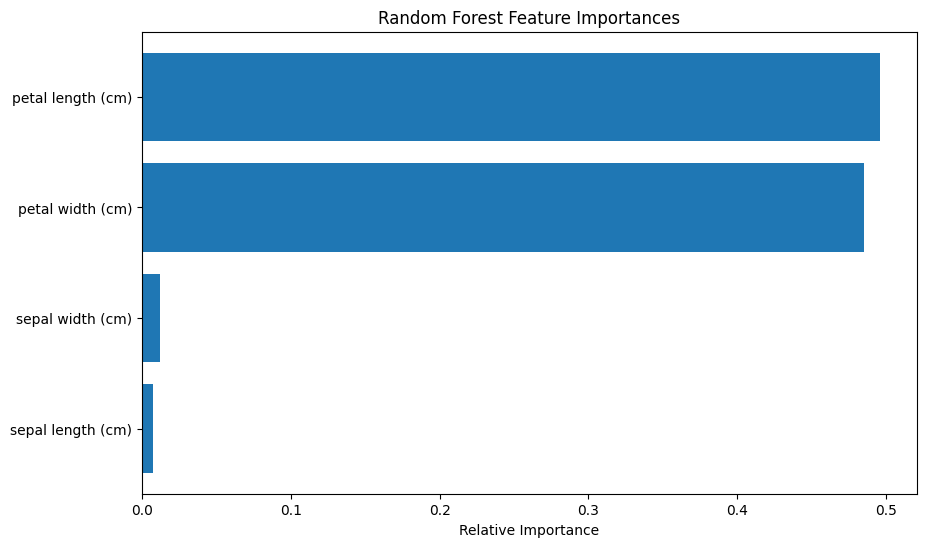

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

# Assuming you have already trained the Random Forest model as per previous steps
# Extract the feature importances from the RandomForest model
importances_rf = rf_reg.feature_importances_
indices_rf = np.argsort(importances_rf)

# Plot the feature importance for Random Forest
plt.figure(figsize=(10, 6))
plt.title("Random Forest Feature Importances")
plt.barh(range(X.shape[1]), importances_rf[indices_rf], align="center")
plt.yticks(range(X.shape[1]), X.columns[indices_rf])
plt.xlabel("Relative Importance")
plt.show()


In [14]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Apply GridSearchCV for hyperparameter tuning
grid_search_rf = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                              param_grid=param_grid_rf, cv=5, n_jobs=-1, verbose=2)

grid_search_rf.fit(X_train_scaled, y_train)

# Get the best parameters and evaluate the performance
best_rf_model = grid_search_rf.best_estimator_
y_pred_best_rf = best_rf_model.predict(X_test_scaled)

# Evaluate the tuned model
r2_best_rf = r2_score(y_test, y_pred_best_rf)
print(f"Best Random Forest Model R^2 after tuning: {r2_best_rf}")


Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Random Forest Model R^2 after tuning: 0.9984201112877583
